In [56]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

[[ 1.58503622]
 [-0.70662524]
 [-0.3174322 ]
 [ 0.80577698]
 [-1.70175272]
 [-0.01652651]
 [-0.98379468]
 [ 0.96272496]
 [-0.50493608]
 [-0.37687133]
 [-0.17261455]
 [-1.51378607]
 [ 0.17370509]
 [-3.13735851]
 [-0.2218808 ]
 [ 0.08842366]
 [ 2.04227411]
 [-1.7448853 ]
 [-1.00578347]
 [ 1.02838446]
 [ 0.06733579]
 [ 1.3549555 ]
 [-1.30037879]
 [-0.12432816]
 [-0.07927812]
 [-1.8422808 ]
 [ 0.99713456]
 [-0.73881309]
 [-1.68716111]
 [ 0.16622607]
 [ 0.46391189]
 [ 0.77712419]
 [ 0.86247467]
 [-1.20541078]
 [ 0.25315841]
 [-0.91331479]
 [-1.00841533]
 [-0.34176248]
 [ 0.43317441]
 [ 1.24092056]
 [ 1.07358466]
 [ 1.13834655]
 [-1.01976495]
 [ 0.8873149 ]
 [ 0.15617432]
 [-0.19109748]
 [-1.56197272]
 [ 0.53872042]
 [-0.80871347]
 [-1.2562173 ]
 [ 0.01610858]
 [-0.67887667]
 [ 1.13660381]
 [-0.91451308]
 [ 1.89692011]
 [ 1.2110277 ]
 [ 0.71355445]
 [-0.04284552]
 [ 1.83903498]
 [-2.11324715]
 [ 1.31370313]
 [-0.04599226]
 [ 1.24925569]
 [ 1.50175108]
 [-0.86343924]
 [ 1.8235398 ]
 [ 0.54267

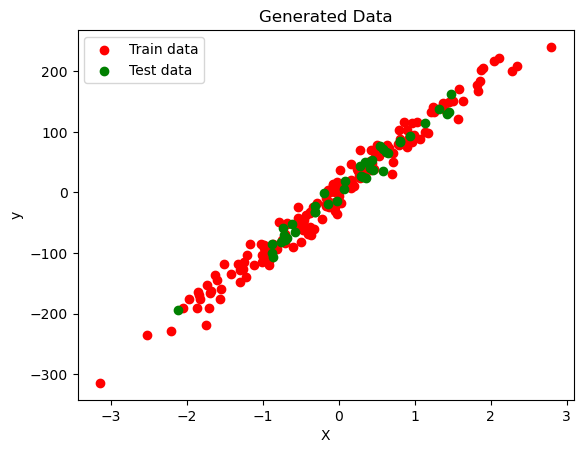

In [39]:
X, y = make_regression(n_samples=200, n_features=1, noise=16)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=254397)
plt.scatter(X_train, y_train, color='red', label='Train data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data')
plt.show()

In [6]:
#Normalizacja
y_min = min(y_train)
y_max = max(y_train)
y_train = [(y_comp - y_min) / (y_max - y_min) for y_comp in y_train]

x_min = min(X_train)
x_max = max(X_train)
X_train = np.array([(x_comp - x_min) / (x_max - x_min) for x_comp in X_train])

Text(0, 0.5, 'Y')

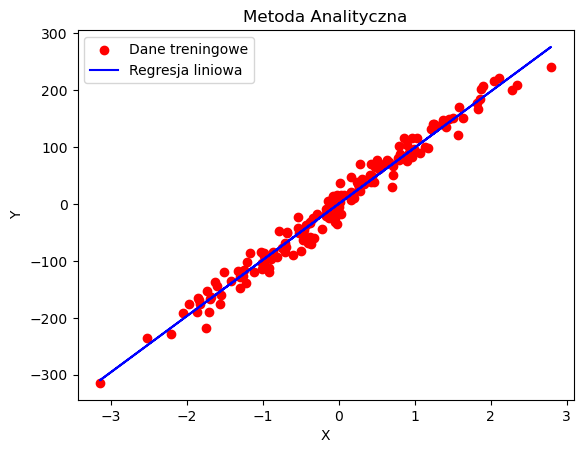

In [58]:
#Metoda analityczna
theta = (np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train)
y_pred = X_train @ theta
plt.scatter(X_train, y_train, color='red', label='Dane treningowe')
plt.plot(X_train, y_pred, color='blue', label='Regresja liniowa')
plt.title('Metoda Analityczna')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')


Analityczna: [98.65750658], numeryczna: [98.65750644]


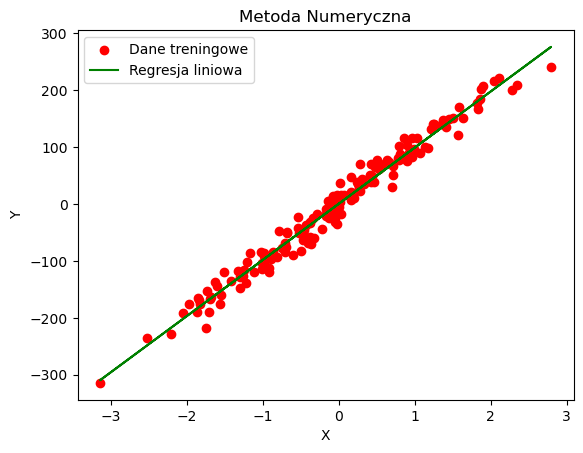

In [59]:
#Metoda numeryczna
def cost_function(teta, X, y):
    return 1/(len(X))*(y - X.T * teta) @ (y - X.T * teta).T
result = minimize(cost_function, x0=0, args=(X_train, y_train), method='Powell')
coeff = result.x
y_pred_powell = X_train.dot(coeff)
plt.scatter(X_train, y_train, color='red', label='Dane treningowe')
plt.plot(X_train, y_pred_powell, color='green', label='Regresja liniowa')
plt.title('Metoda Numeryczna')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
print(f'Analityczna: {theta}, numeryczna: {coeff}')

In [2]:
#Wczytywanie danych z danych z gry
column_names = ['X', 'y']
flapy_1 = pd.read_csv('last_autosave_1.csv', names=column_names)
flapy_2 = pd.read_csv('last_autosave_2.csv', names=column_names)
flapy_3 = pd.read_csv('last_autosave_3.csv', names=column_names)
X_1 = np.array(flapy_1['X']).reshape(-1,1)
y_1 = np.array(flapy_1['y'])

X_2 = flapy_2['X']
y_2 = flapy_2['y']

X_3 = flapy_3['X']
y_3 = flapy_3['y']

In [26]:
y_min = min(y_1)
y_max = max(y_1)
y_1 = [(y_comp - y_min) / (y_max - y_min) for y_comp in y_1]

x_min = min(X_1)
x_max = max(X_1)
X_1 = np.array([(x_comp - x_min) / (x_max - x_min) for x_comp in X_1])

Text(0, 0.5, 'Y')

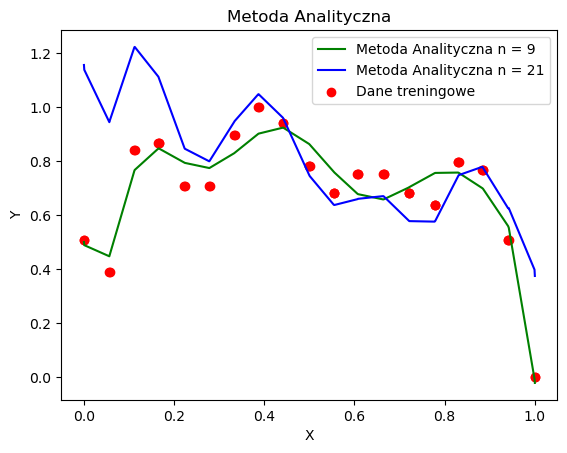

In [9]:
poly_9_1 = PolynomialFeatures(9, include_bias=True)
poly_21_1 = PolynomialFeatures(21, include_bias=True)

# X_9_1_train, X_9_1_test, y_9_1_train, y_9_1_test = train_test_split(X_1, y_1, test_size = 1/2, random_state=254397)
# X_21_1_train, X_21_1_test, y_21_1_train, y_21_1_test = train_test_split(X_1, y_1, test_size = 1/2, random_state=254397)

#XP_1 = np.c_[X_1, np.ones_like(X_1)]

XP_9_1 = poly_9_1.fit_transform(X_1)
XP_21_1 = poly_21_1.fit_transform(X_1)

reg9 = LinearRegression()
reg9.fit(XP_9_1, y_1)
y_pred_9_1_linear = reg9.predict(XP_9_1)
# print(reg.coef_)

reg21 = LinearRegression()
reg21.fit(XP_21_1, y_1)
y_pred_21_1_linear = reg21.predict(XP_21_1)


# print(f'Sklearn: {reg.score(XP_9_1, y_1)}')

# print(f'XP_9_1: {XP_9_1.shape}, \nXP_9_1.T: {XP_9_1.T.shape}, \ny_1: {y_1.shape}, \nXP_9_1.T @ XP_9_1: {(XP_9_1.T @ XP_9_1).shape},\n np.linalg.inv(XP_9_1.T @ XP_9_1): {(np.linalg.inv(XP_9_1.T @ XP_9_1)).shape}')
theta_9_1 = np.linalg.inv(XP_9_1.T @ XP_9_1) @ XP_9_1.T @ y_1
y_pred_9_1 = XP_9_1 @ theta_9_1

theta_21_1 = np.linalg.inv(XP_21_1.T @ XP_21_1) @ XP_21_1.T @ y_1
y_pred_21_1 = XP_21_1 @ theta_21_1
# print(y_pred_9_1)
# print(X_1)

# print(f'Analityczna: {theta_9_1}')

plt.plot(X_1, y_pred_9_1, color='green', label='Metoda Analityczna n = 9')
plt.plot(X_1, y_pred_21_1, color='blue', label='Metoda Analityczna n = 21')
plt.scatter(X_1, y_1, color='red', label='Dane treningowe')
# plt.plot(X_1, y_pred_9_1_linear, color='green', label='Regresja liniowa n = 9')
# plt.plot(X_1, y_pred_21_1_linear, color='black', label='Regresja liniowa n = 21')
plt.title('Metoda Analityczna')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

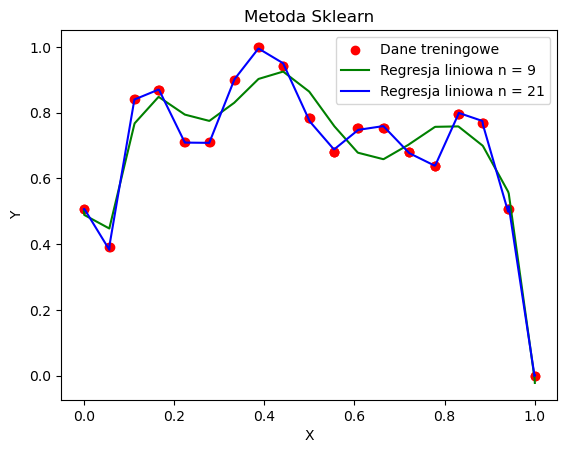

In [5]:
# plt.plot(X_1, y_pred_9_1, color='pink', label='Metoda Analityczna n = 9')
# plt.plot(X_1, y_pred_21_1, color='yellow', label='Metoda Analityczna n = 21')
plt.scatter(X_1, y_1, color='red', label='Dane treningowe')


plt.plot(X_1, y_pred_9_1_linear, color='green', label='Regresja liniowa n = 9')
plt.plot(X_1, y_pred_21_1_linear, color='blue', label='Regresja liniowa n = 21')
plt.title('Metoda Sklearn')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

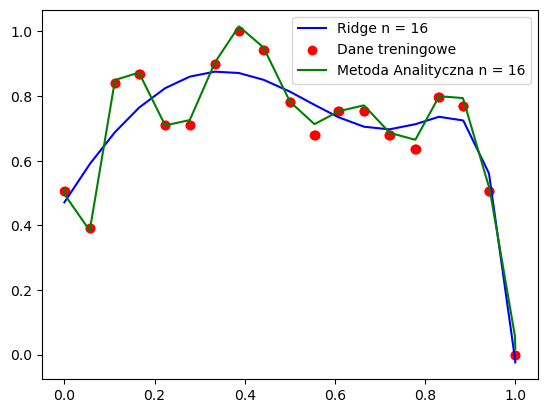

In [57]:
poly_16_1 = PolynomialFeatures(16, include_bias=True)
XP_16_1 = poly_16_1.fit_transform(X_1)

lambda_16 = 100
I = np.ones_like((XP_16_1.T @ XP_16_1))
theta_16_1 = np.linalg.inv(XP_16_1.T @ XP_16_1 + lambda_16 * I) @ XP_16_1.T @ y_1
y_pred_16_1 = XP_16_1 @ theta_16_1



ridge = Ridge(alpha=0.001)
ridge.fit(XP_16_1, y_1)
y_pred_ridge = ridge.predict(XP_16_1)


plt.plot(X_1, y_pred_ridge, color='blue', label='Ridge n = 16')
plt.scatter(X_1, y_1, color='red', label='Dane treningowe')
plt.plot(X_1, y_pred_16_1, color='green', label='Metoda Analityczna n = 16')
plt.legend()